<a href="https://colab.research.google.com/github/FathimaThan/Inida_Election_2024_EDA/blob/main/election_data_india_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset
election_df = pd.read_csv('/content/election_results_2024.csv')

# Data Preprocssing and EDA

In [3]:
election_df.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


In [4]:
election_df.tail()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
538,Wardha,8,AMAR SHARADRAO KALE,Nationalist Congress Party – Sharadchandra Pawar,RAMDAS CHANDRABHAN TADAS,Bharatiya Janata Party,81648,Result Declared
539,Wayanad,4,RAHUL GANDHI,Indian National Congress,ANNIE RAJA,Communist Party of India,364422,Result Declared
540,West Delhi,6,KAMALJEET SEHRAWAT,Bharatiya Janata Party,MAHABAL MISHRA,Aam Aadmi Party,199013,Result Declared
541,Yavatmal- Washim,14,SANJAY UTTAMRAO DESHMUKH,Shiv Sena (Uddhav Balasaheb Thackrey),RAJSHRITAI HEMANT PATIL (MAHALLE),Shiv Sena,94473,Result Declared
542,Zahirabad,5,SURESH KUMAR SHETKAR,Indian National Congress,B. B. PATIL,Bharatiya Janata Party,46188,Result Declared


In [5]:
election_df.shape

(543, 8)

Ther are 8 columns and 543 rows

In [6]:
election_df.describe()

,Const. No.
count,543.000000
mean,18.178637
std,16.427840
min,1.000000
25%,6.000000
50%,14.000000
75%,25.000000
max,80.000000


There are 543 constituencies

In [7]:
election_df.describe(include = 'object').transpose()

,count,unique,top,freq
Constituency,543,541,Maharajganj,2
Leading Candidate,543,542,RAHUL GANDHI,2
Leading Party,543,42,Bharatiya Janata Party,240
Trailing Candidate,542,542,RAMCHANDRA CHOUDHARY,1
Trailing Party,542,42,Indian National Congress,167
Margin,543,543,329991,1
Status,543,2,Result Declared,542


* Among the constituencies,'Maharajganj' appears twice. This could indicate a data entry error.
* 'RAHUL GANDHI' appears twice, as he has contested in two different constituencies.
* Bharatiya Janata Party' leads in 240 constituencies, making it the most dominant party in this dataset. With 42 unique parties, there is considerable political diversity.
* Indian National Congress' appears as the trailing party in 167 constituencies. Similar to the leading party, there are 42 unique trailing parties.
* Every entry has a unique margin of victory, with the highest being 329991 votes.
* Out of 543 entries, 542 results have been declared, indicating the status of one constituency is not declared.

In [8]:
election_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   Const. No.          543 non-null    int64 
 2   Leading Candidate   543 non-null    object
 3   Leading Party       543 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              543 non-null    object
 7   Status              543 non-null    object
dtypes: int64(1), object(7)
memory usage: 34.1+ KB


* There are null values in Trainling Candidate and Trailing Party columns.
* Margin column is in object datatype.

In [9]:
election_df.isna().sum()

Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    1
Trailing Party        1
Margin                0
Status                0
dtype: int64

In [10]:
election_df[election_df.isna().any(axis=1)]

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
493,Surat,24,MUKESHKUMAR CHANDRAKAANT DALAL,Bharatiya Janata Party,NaN,NaN,-,Uncontested


"Even before the counting began, the Bharatiya Janata Party’s (BJP) candidate from Gujarat’s Surat, Mukesh Dalal, became the first winner in the Lok Sabha elections on April 22 as the nomination papers of Congress’s picks were rejected and other candidates withdrew from the race."
source: news18.com

In [11]:
# Convert 'Margin' column to numeric
election_df['Margin'] = pd.to_numeric(election_df['Margin'], errors='coerce')

In [12]:
election_df = election_df.fillna({'Trailing Candidate': 'N/A', 'Trailing Party': 'N/A', 'Margin': 0})

In [13]:
election_df[election_df['Constituency']=='Maharajganj']

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
332,Maharajganj,63,PANKAJ CHAUDHARY,Bharatiya Janata Party,VIRENDRA CHAUDHARY,Indian National Congress,35451.0,Result Declared
333,Maharajganj,19,"JANARDAN SINGH ""SIGRIWAL""",Bharatiya Janata Party,AAKASH KUMAR SINGH,Indian National Congress,102651.0,Result Declared


There are constituencies named Maharajganj in both Uttar Pradesh (UP) and Bihar.

Pankaj Chaudhary has won in UP and Janardan Singh Sigriwal has won in Bihar.

In [14]:
election_df.loc[election_df['Constituency']=='Maharajganj', 'Constituency'] = ['Maharajganj(UP)', 'Maharajganj(Bihar)']

In [15]:
election_df.iloc[332:334]

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
332,Maharajganj(UP),63,PANKAJ CHAUDHARY,Bharatiya Janata Party,VIRENDRA CHAUDHARY,Indian National Congress,35451.0,Result Declared
333,Maharajganj(Bihar),19,"JANARDAN SINGH ""SIGRIWAL""",Bharatiya Janata Party,AAKASH KUMAR SINGH,Indian National Congress,102651.0,Result Declared


# Data Visualization

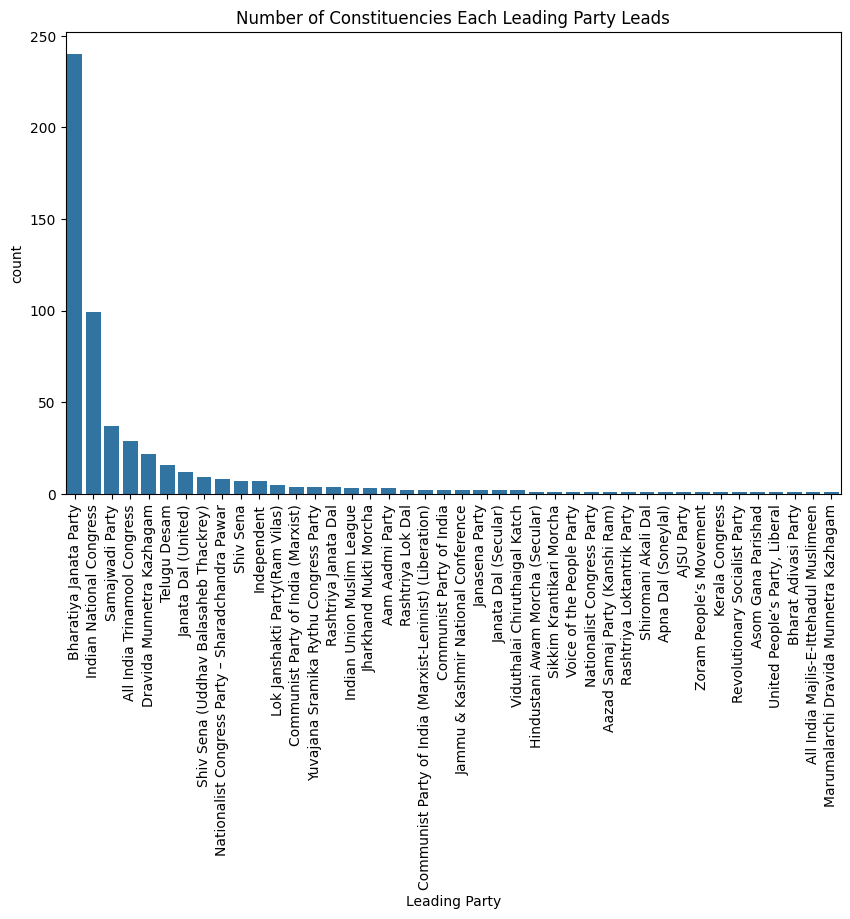

In [16]:
plt.figure(figsize = (10,6))
sns.countplot(data = election_df, x='Leading Party',order=election_df['Leading Party'].value_counts().index)
plt.title('Number of Constituencies Each Leading Party Leads')
plt.xticks(rotation = 90)
plt.show()

In [17]:
leading_party_counts = election_df['Leading Party'].value_counts()
leading_party_counts

Leading Party
Bharatiya Janata Party                                      240
Indian National Congress                                     99
Samajwadi Party                                              37
All India Trinamool Congress                                 29
Dravida Munnetra Kazhagam                                    22
Telugu Desam                                                 16
Janata Dal (United)                                          12
Shiv Sena (Uddhav Balasaheb Thackrey)                         9
Nationalist Congress Party – Sharadchandra Pawar              8
Shiv Sena                                                     7
Independent                                                   7
Lok Janshakti Party(Ram Vilas)                                5
Communist Party of India (Marxist)                            4
Yuvajana Sramika Rythu Congress Party                         4
Rashtriya Janata Dal                                          4
Indian Union Muslim League

In [18]:
# group parties with value counts < 3 into 'Others'
others_counts = leading_party_counts[leading_party_counts<3].sum()
others_counts

31

In [19]:
leading_party_counts = leading_party_counts[leading_party_counts>=3]
leading_party_counts['Others'] = others_counts

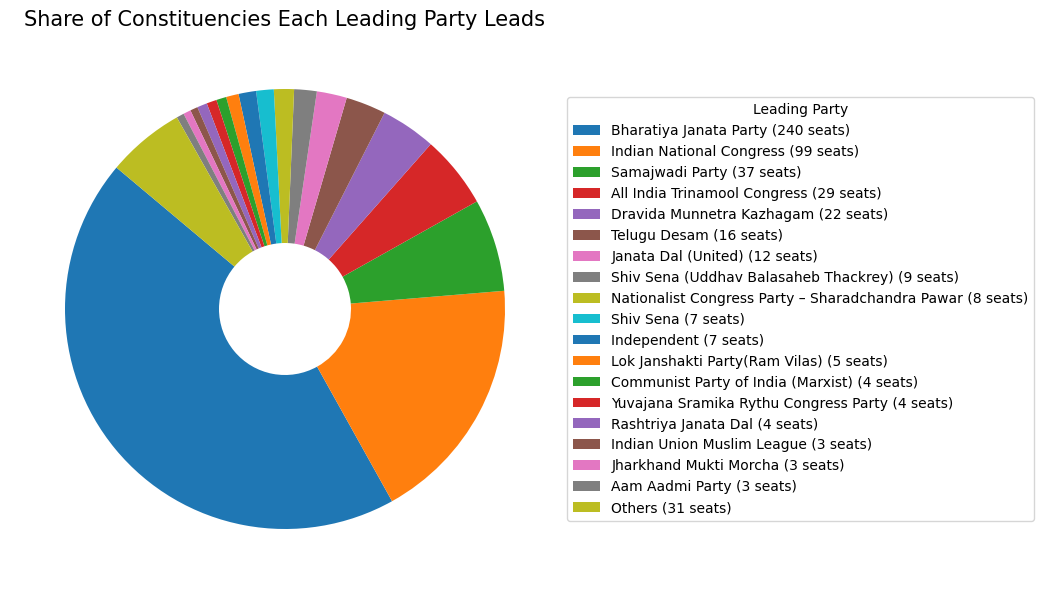

In [20]:
# Plot the donut chart
plt.figure(figsize=(10, 8))
wedges, _ = plt.pie(leading_party_counts, labels=None, startangle=140, textprops={'fontsize': 12}, wedgeprops=dict(width=0.7))

# Add legend-like list for names and value count(ie seats)
legend_labels = [f'{party} ({count} seats)' for party, count in zip(leading_party_counts.index, leading_party_counts)]
plt.legend(wedges, legend_labels, title="Leading Party", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.subplots_adjust(left=0.1, right=0.65)

# Adjust layout
plt.title('Share of Constituencies Each Leading Party Leads', fontsize=15)
plt.show()

BJP is leading with 240 seats followed by Indian National Congress with 99 seats.

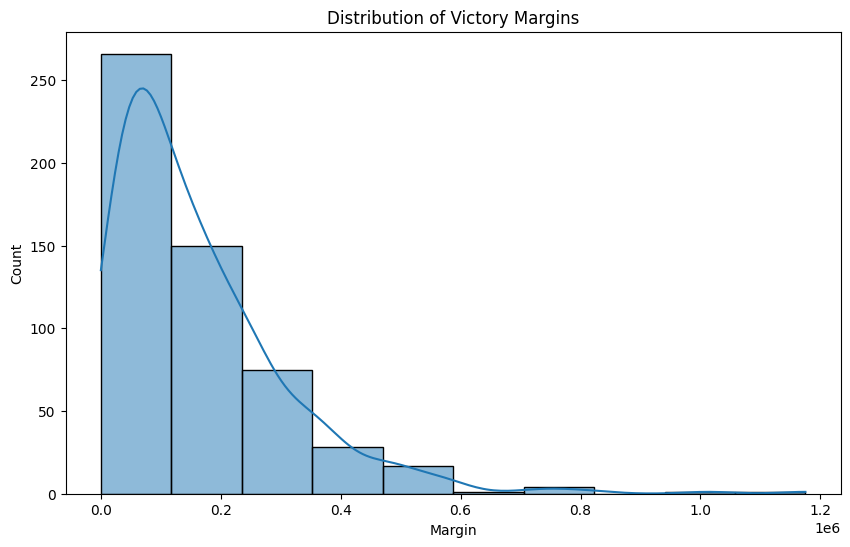

In [21]:
# Histogram - Margin Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=election_df, x='Margin', bins=10, kde=True)
plt.title('Distribution of Victory Margins')
plt.show()

In [22]:
top_20_winners = election_df.sort_values(by = 'Margin', ascending = False).head(20)

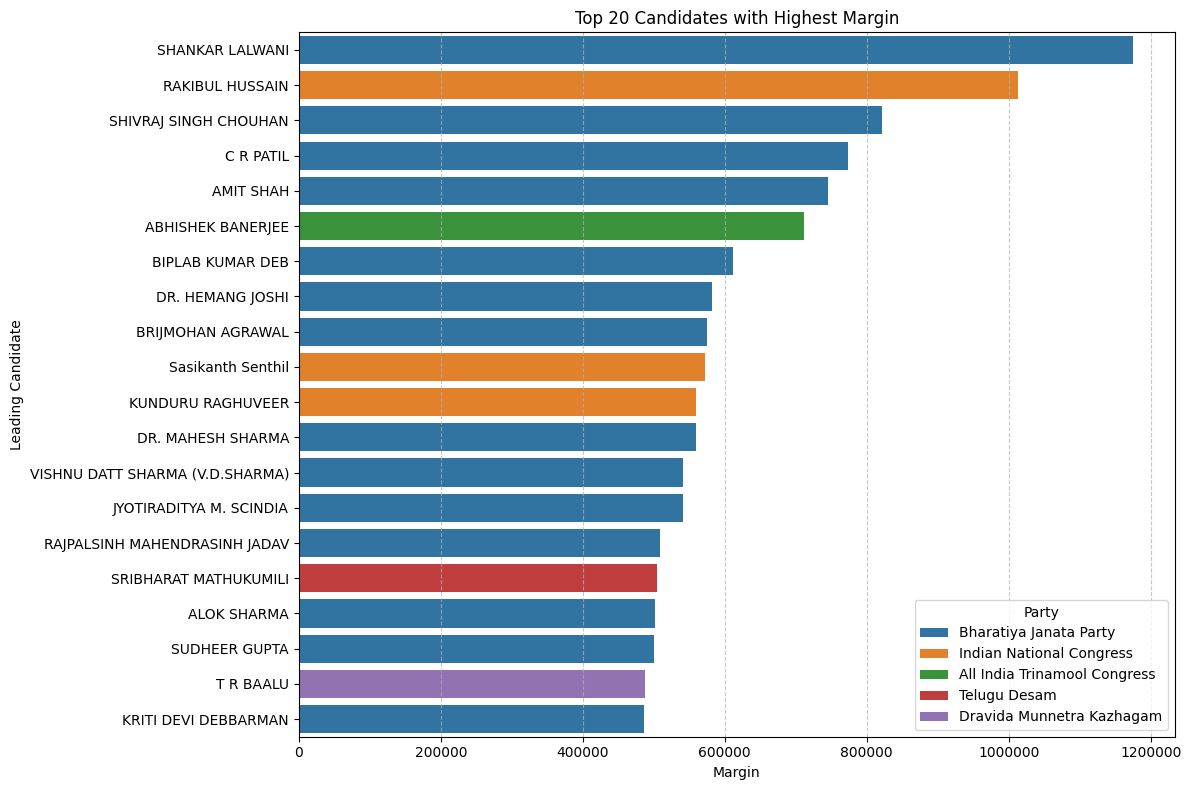

In [23]:
from matplotlib.ticker import ScalarFormatter

# Create a horizontal bar plot with Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Margin', y='Leading Candidate', data=top_20_winners, hue='Leading Party', dodge=False)
plt.xlabel('Margin')
plt.ylabel('Leading Candidate')
plt.title('Top 20 Candidates with Highest Margin')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title='Party', loc='lower right')

# Get the current Axes instance
ax = plt.gca()

# plt.gca().invert_yaxis()

# Format the x-axis tick labels
ax.xaxis.set_major_formatter(ScalarFormatter())

# Set the formatter to not use scientific notation
ax.xaxis.get_major_formatter().set_scientific(False)

plt.tight_layout()
plt.show()

In [24]:
bottom_20_winners = election_df.sort_values(by = 'Margin', ascending = True).head(20)

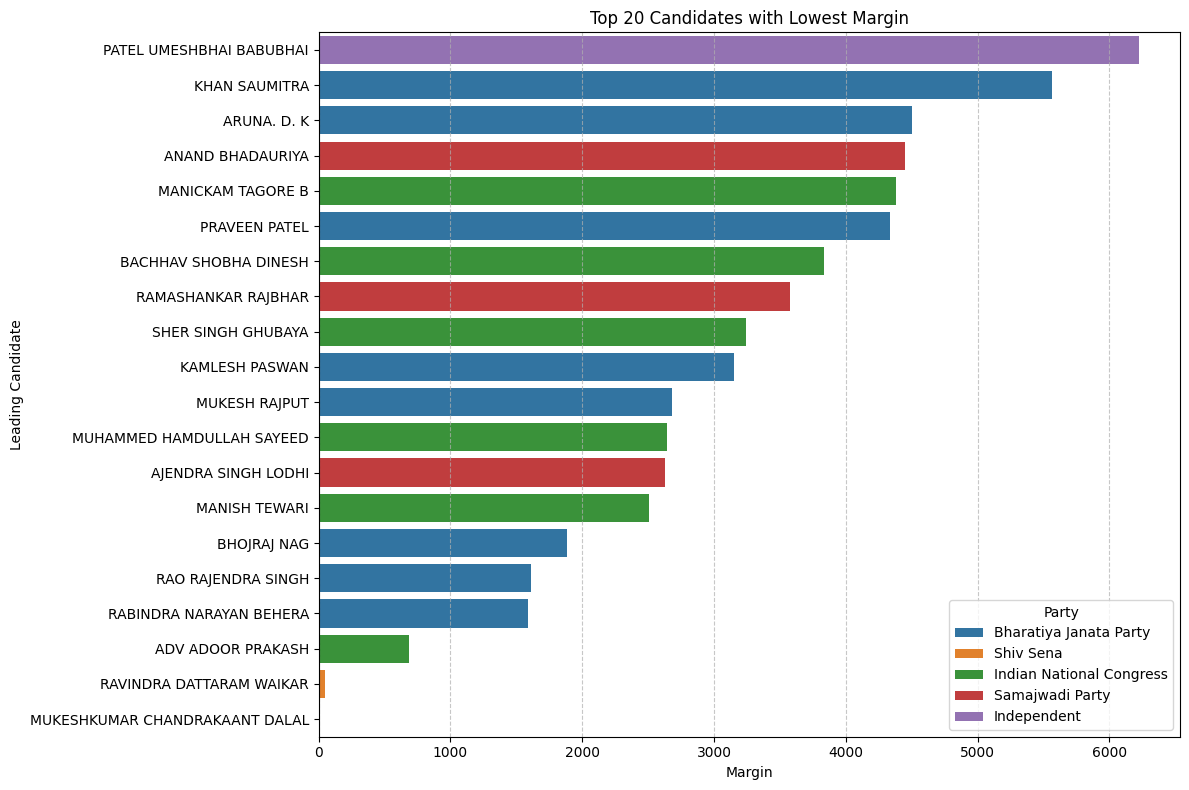

In [25]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Margin', y='Leading Candidate', data=bottom_20_winners, hue='Leading Party', dodge=False)
plt.xlabel('Margin')
plt.ylabel('Leading Candidate')
plt.title('Top 20 Candidates with Lowest Margin')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title='Party', loc='lower right')

# Get the current Axes instance
ax = plt.gca()

plt.gca().invert_yaxis()

# Format the x-axis tick labels
ax.xaxis.set_major_formatter(ScalarFormatter())

# Set the formatter to not use scientific notation
ax.xaxis.get_major_formatter().set_scientific(False)

plt.tight_layout()
plt.show()
# Set the formatter to not use scientific notation
ax.xaxis.get_major_formatter().set_scientific(False)

plt.show()